In [2]:
from astropy.io import fits
from astropy import table
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [3]:
catFile = 'catalogs/clumpy_stripe82_fullsample.fits'
catFits = fits.open(catFile) 
# catFits.info() 
catTable = table.Table(catFits[1].data)
# print(*catTable.columns, sep='\n')
n = 0
for column in catTable.columns:
    print(n, column,'\n')
    n+=1

0 objid_1 

1 sample_1 

2 asset_id 

3 objid_str 

4 total_count 

5 total_weight 

6 t01_smooth_or_features_a01_smooth_count 

7 t01_smooth_or_features_a01_smooth_weight 

8 t01_smooth_or_features_a01_smooth_fraction 

9 t01_smooth_or_features_a01_smooth_weighted_fraction 

10 t01_smooth_or_features_a02_features_or_disk_count 

11 t01_smooth_or_features_a02_features_or_disk_weight 

12 t01_smooth_or_features_a02_features_or_disk_fraction 

13 t01_smooth_or_features_a02_features_or_disk_weighted_fraction 

14 t01_smooth_or_features_a03_star_or_artifact_count 

15 t01_smooth_or_features_a03_star_or_artifact_weight 

16 t01_smooth_or_features_a03_star_or_artifact_fraction 

17 t01_smooth_or_features_a03_star_or_artifact_weighted_fraction 

18 t01_smooth_or_features_total_count 

19 t01_smooth_or_features_total_weight 

20 t02_edgeon_a04_yes_count 

21 t02_edgeon_a04_yes_weight 

22 t02_edgeon_a04_yes_fraction 

23 t02_edgeon_a04_yes_weighted_fraction 

24 t02_edgeon_a05_no_count 

25 t0

In [4]:
catTable[1]['FIELD']

125

## Spectra from Bulk

In [4]:
for cat in catTable[:5]:
    print(str(cat['RA'])+','+str(cat['DEC']))

315.90303127,-1.22853775
321.63790911,-1.12280623
324.56071869,-0.78378343
309.70230142,-0.22634834
312.71737669,-0.32570262


In [5]:
def genSpectraAQ(file):
    objFits = fits.open(file)
    objTable = table.Table(objFits[1].data)
    plt.figure(figsize=(15,7.5))
    plt.plot(10**objTable['loglam'],objTable['flux'])
    plt.show()
    return objTable

In [6]:
# genSpectraAQ('spec-0985-52431-0287.fits')

## Testing AstroQuery

In [7]:
test = {'RA':catTable[1]['RA'],'DEC':catTable[1]['DEC']}
pos = coords.SkyCoord(test['RA'],test['DEC'],unit='deg')
xid = SDSS.query_region(pos,spectro=True)
xid

/anaconda3/lib/python3.6/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
321.63790960047,-1.1227999503427,1237656567042343485,2583,301,1,125,0.2234196,988,52520,310,1112474362390276096,26,SDSS


In [12]:
def specPlt(catTable,index,spData):
    plt.figure(figsize=(10,5))
    plt.plot(10**spData['loglam'],spData['flux'])
    plt.title('OBJ: %s, RA: %.3f, DEC: %.3f'%(index,catTable[index]['RA'],catTable[index]['DEC']))
    plt.xlabel("Wavelength [Angstroms]")
    plt.ylabel("Flux [$10^{-17}$ erg/cm$^2$/s/A]")
    plt.tight_layout()
    plt.savefig('spectra imgs/obj_%s.png'%index)
    plt.show()

In [13]:
def genSpectra(catTable,index,pltShow):
    pos = coords.SkyCoord(catTable[index]['RA'],
                          catTable[index]['DEC'],unit='deg')
    xid = SDSS.query_region(pos,spectro=True)
    
    if not xid:
        print('--------\nNo spectra for object %s\n--------'%index)
        return
    sp = SDSS.get_spectra(matches=xid)
    spData = sp[0][1].data
    if pltShow:
        specPlt(catTable,index,spData)
    return xid,table.Table(spData)

In [14]:
# from tqdm import tqdm_notebook as tqdm
# genBar = tqdm(desc='object',total=len(catTable))
# for n in range(0,len(catTable)):
#     genSpectra(catTable,n,False)
#     genBar.update(1)

/anaconda3/lib/python3.6/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


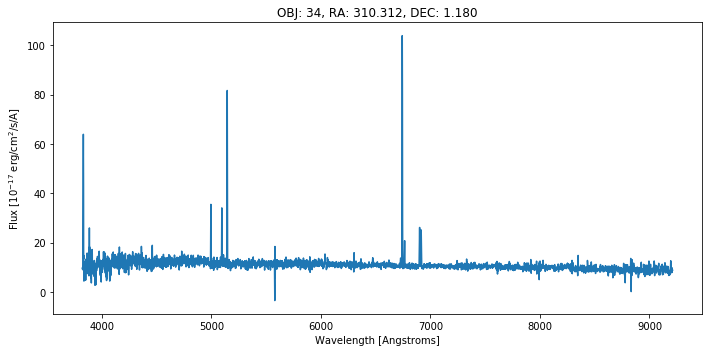

In [15]:
obj34 = genSpectra(catTable,34,True)

In [16]:
obj34[0]

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
310.311530645619,1.17984347905548,1237656896140018098,2659,301,6,61,0.02704323,981,52435,599,1104672501331421184,26,SDSS
310.311530645619,1.17984347905548,1237656896140018098,2659,301,6,61,0.02705698,1021,52460,527,1149688706815256576,26,SDSS


In [17]:
catTable[34]

objid_1,sample_1,asset_id,objid_str,total_count,total_weight,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_count,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_count,t02_edgeon_total_weight,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_count,t03_bar_total_weight,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_count,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_count,t05_bulge_prominence_total_weight,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_total_count,t06_odd_total_weight,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_count,t07_rounded_total_weight,t08_odd_feature_a19_ring_count,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_fraction,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_count,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_fraction,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_count,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_fraction,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_count,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_fraction,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_count,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_fraction,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_count,t08_odd_feature_a24_merger_weight,t08_o

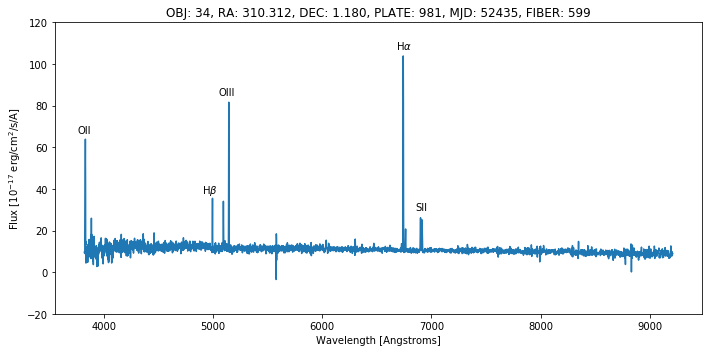

In [18]:
plt.figure(figsize=(10,5))
plt.plot(10**obj34[1]['loglam'],obj34[1]['flux'])
plt.title('OBJ: %s, RA: %.3f, DEC: %.3f, PLATE: %s, MJD: %s, FIBER: %s'
          %(34,catTable[34]['RA'],catTable[34]['DEC'],obj34[0]['plate'][0],
            obj34[0]['mjd'][0],obj34[0]['fiberID'][0]))
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Flux [$10^{-17}$ erg/cm$^2$/s/A]")
plt.ylim(-20,120)
# plt.xlim(6800,7000)
plt.text(6680,107,r'H$\alpha$')
plt.text(6850,30,'SII')
plt.text(5050,85,'OIII')
plt.text(4900,38,r'H$\beta$')
plt.text(3760,67,'OII')
plt.tight_layout()
plt.savefig('spectra imgs/label_obj_%s.png'%34)
plt.show()

## Let's play "Try to get a metallicity!"

We will try to generate a metallicity for object 34 in Melanie's clump catalog as an example (since I'm too lazy to look for a different spectra).

### M91 Theoretical Calibration

Let's use the M91 calibration mentioned in [Kewley & Ellison 2008 (KE08)](http://adsabs.harvard.edu/abs/2008ApJ...681.1183K):

$$12 + \log(O/H)_\text{lower} = 12 - 4.944 + 0.767x + 0.602x^2 - y(0.29+0.332x - 0.331x^2)$$

$$12 + \log(O/H)_\text{upper} = 12 - 2.939 - 0.2x - 0.37x^2 - 0.305 x^3 - 0.0283x^4 - y(0.0047 - 0.221x - 0.102x^2 - 0.0817x^3 - 0.00717x^4)$$

where $$x = \log R_{23} = \log\left[\frac{[\text{OII}\lambda3727 + [\text{OIII}]\lambda4959 + [\text{OIII}]\lambda5007}{\text{H}\beta}\right]$$
and $$y = \log\text{O}_{32} = \log\left[\frac{[\text{OIII}]\lambda4959 + [\text{OIII}]\lambda5007}{[\text{OII}]\lambda3727}\right]$$

For now, we'll be lazy and take the line fluxes directly from the [SDSS DR12 Science Archive Server](https://dr12.sdss.org/spectrumDetail?mjd=52435&fiber=599&plateid=981).

In [19]:
def getlogR23(OII3727,OIII4959,OIII5007,HB):
    return np.log10((OII3727 + OIII4959 + OIII5007)/HB)

def getlogO32(OIII4959,OIII5007,OII3727):
    return np.log10((OIII4959 + OIII5007)/OII3727)

In [20]:
def getlogOHlow(x,y):
    return (-4.944 + 0.767*x + 0.602*x**2 - y*(0.29 + 0.332*x - 0.331*x**2))

def getlogOHup(x,y):
    return (-2.939 - 0.2*x - 0.37*x**2 - 0.305*x**3 - 0.0283*x**4 - 
            y*(0.0047 - 0.221*x - 0.102*x**2 - 0.0817*x**3 - 0.00717*x**4))

In [21]:
# all in units of 1e-17 erg/cm^2/s
OII3727 = 108
OIII4959 = 68.61
OIII5007 = 207.8
HB = 81.96

In [22]:
x = getlogR23(OII3727,OIII4959,OIII5007,HB)
y = getlogO32(OIII4959,OIII5007,OII3727)

In [25]:
logOHlow = getlogOHlow(x,y)
logOHup = getlogOHup(x,y)

print(' low O/H:\t',10**logOHlow,'\nhigh O/H:\t',10**logOHup)

 low O/H:	 4.9381052649105053e-05 
high O/H:	 0.0005625498281286387


Let's ssee how it compares to the other items on the graph by adding 12:

In [26]:
logOHlow12 = logOHlow+12
logOHup12 = logOHup+12
print('low:\tlog O/H + 12 =',logOHlow12,'\nhigh:\tlog O/H + 12 =',logOHup12)

low:	log O/H + 12 = 7.693560343490305 
high:	log O/H + 12 = 8.75016099633521


Comparing these to the items shown in Figures 1 and 2, our lower branch doesn't even appear on the graph while the upper branch actually appears fairly reasonable.

### Branching Out

Lets determine if this makes sense by following section A1 in KE08. First we need to determine if we are using the upper branch or the lower branch. To do this, we need to get $$\log\left(\frac{[\text{NII}]\lambda6584}{[\text{OII}]\lambda3727}\right)$$

In [27]:
def getlogNiiOii(NII6584,OII3727):
    return np.log10(NII6584/OII3727)

In [28]:
NII6584 = 48.93

In [29]:
logNiiOii = getlogNiiOii(NII6584,OII3727)
print(logNiiOii)

-0.34384853972701146


The break between upper and lower branches is set at $$\log\left(\frac{[\text{NII}]}{[\text{OII}]}\right) \approx -1.2$$ so we should use the upper branch, as we kind of determined already.

### Check the graphs!

How about the mass, though? Where does it fit on this graph? That is a, uh, good question... these catalogs specifically don't have masses, and neither does the archive server, but I'd imagine I could find them.

Okay I think I got it after a long treasure hunt. [Here](http://skyserver.sdss.org/DR12//en/tools/explore/Summary.aspx?sid=1104672501331421184) is the link (I used `FSPSGranEarlyDust`), which gives us a $\log M = 9.49196471616599$. (It also gives us lots of useful stuff like age, metallicity(!), mass to light, etc.)

The point $(\log M, 12 + \log(O/H)_\text{upper}) = (9.492,8.750)$ fits nicely onto the graph in Fig. 1 for M91.

### Metallicity problems?
Quick aside to look at metallicities. We're given a $Z$ on that webpage, but it doesn't match up...

In [30]:
givenZ12 = np.log10(0.00769999995827675) + 12

In [28]:
print('given:\t\tlog Z + 12 =',givenZ12, '\ncalculated:\tlog O/H + 12 =',logOHup12)

given:		log Z + 12 = 9.886490722819213 
calculated:	log O/H + 12 = 8.75016099633521


~~ACTUALLY this makes sense since we should only be doing *relative* metallicity comparisons and this might be using a different calibration. Interestingly, the given $Z$ doesn't seem to match **any** of the calibrations listed in KE08.~~

**UPDATE (